In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

In [ ]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()
idx1 = np.where(y_train_full == 6)[0]
idx1_test = np.where(y_test_full == 6)[0]

In [ ]:
idx2 = np.where(y_train_full == 7)[0]
idx2_test = np.where(y_test_full == 7)[0]

In [ ]:
two_class_train_indices = np.append(idx1, idx2)
two_class_test_indices = np.append(idx1_test, idx2_test)

In [ ]:
two_class_train_indices = np.sort(two_class_train_indices)
two_class_test_indices = np.sort(two_class_test_indices)

In [ ]:
x_train = x_train_full[two_class_train_indices]/255
y_train = y_train_full[two_class_train_indices]
x_test = x_test_full[two_class_test_indices]/255
y_test = y_test_full[two_class_test_indices]

In [ ]:
x_test.shape

(2000, 32, 32, 3)

In [ ]:
x_train = x_train.flatten().reshape(10000, 3072)
x_test = x_test.flatten().reshape(2000, 3072)

In [ ]:
y_train = np.where(y_train== 6, 0, y_train)
y_train = np.where(y_train== 7, 1, y_train)

In [ ]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [ ]:
nx = x_train.size // y_train.size
m = y_train.size

In [ ]:
alpha = 0.002 

In [ ]:
def cost_function(y, y_hat):
    return (- y @ np.log(y_hat.T) - (1 - y) @ np.log(1 - y_hat.T)) / m

In [ ]:
def fit(x, w, b):
    z = w.T @ x + b
    y_hat = sigmoid(z)
    return z, y_hathttps://colab.research.google.com/drive/1cHy8FtX5i2jyZEfuxJTYRPSJLm1jMwq8

In [ ]:
def accuracy(y, y_hat):
    return 1 - np.mean(np.abs(y - y_hat.round()))

In [ ]:
def propagate(nx, m, w, b, x, y, iteration):
        z, y_hat = fit(x, w, b)
        #print(y_hat)
        #print(y)
        w -= alpha / m * (x @ (y_hat - y).T)
        b -= alpha / m * np.sum(y_hat - y)
        k = np.squeeze(cost_function(y, y_hat))
        return float(k), accuracy(y, y_hat), w, b
    
def train(nx, m, x, y, max_it=1000):
    w, b = np.zeros((nx,1)), 0
    accuracy_array = []
    error_array = np.empty(1000)
    for it in range(max_it):
        error, accuracy_metric, w, b = propagate(nx, m, w, b, x, y, it)
        accuracy_array.append(accuracy_metric)
        error_array[it] = error
    return error_array, accuracy_array, w, b

In [ ]:
x_train = x_train.T

In [ ]:
x_train.shape

(3072, 10000)

In [ ]:
X, Y = x_train.reshape((nx, m)), y_train.reshape((1, m))
error_vals, accuracy_vals, W, b = train(nx, m,X, Y)
iteration_number = []
for i in range(1000):
    iteration_number.append(i)

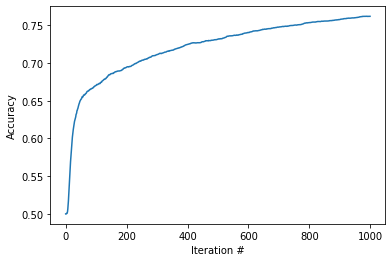

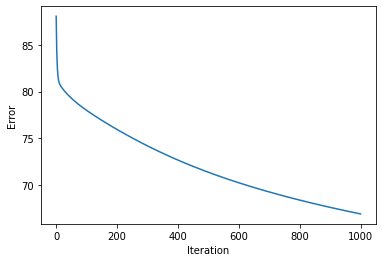

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(iteration_number, accuracy_vals)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Iteration #')

error_plot = np.absolute(error_vals)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Error')
ax2.set_xlabel('Iteration')
ax2.plot(iteration_number, error_plot)

In [ ]:
m = len(y_test)
m

2000

In [ ]:
nx = x_test.size // m

In [ ]:
y_test = np.where(y_test== 6, 0, y_test)
y_test = np.where(y_test== 7, 1, y_test)

In [ ]:
X, Y = x_test.reshape((nx, m)), y_test.reshape((1,m))

z, y_hat = fit(X, W, b)

In [ ]:
Y

array([[0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
print('test accuracy = {}%'.format(accuracy(Y, y_hat) * 100))

test accuracy = 50.3%
